## Neural networks



Here, we will start discussing a different version of ML models: Neural networks


Let's start discussing the building blocks of neural nets. 



A neural network is essentially a chain (function composition) of matrix multiplications and non linearites, called activation functions.

A simple cartoon depicting operation flow in neural networks is the following:

<img src="./images/nn.jpg"> 



The leftmost column, is the input layer, where we pass the training examples.
The middle column, is called the hidden layer. It is essentially a matrix multiplication of the input vector with the input-hidden weight matrix $W_1$, followed by a piece-wise nonlinearity called the activation.


The rightmost layer is the output layer, which again is the matrix multiplication of the output of the hidden layer with the hidden-output weights $W_2$, again followed usually by a non-linear activation.



So, mathematically this looks like this:

$$ s_2(  s_1( W_1 x) * W_2 ) $$ 

where $s_1$ and $s_2$ are non-linear functions, such as sigmoid, tanh, relu or softmax.

We will be discussing all these functions soon.


Let's see an example in numpy of what this looks like with an input vector of size 784, a hidden layer of size 100 and and output layer of size 1, with a sigmoid activation in both layers.

We can think this model as a binary classifier where why classify as 0 if the output of the neural network is <0.5 and 1 if the output is >=0.5.


In [44]:
### 
import numpy as np
from scipy.special import softmax

INPUT_SIZE = 784
HIDDEN_SIZE = 100
OUTPUT_SIZE = 1


In [54]:
## Input-hidden weights

W_1 = np.random.randn( INPUT_SIZE*HIDDEN_SIZE).reshape( INPUT_SIZE, HIDDEN_SIZE ).astype(np.float32)
W_1.shape

(784, 100)

In [55]:
## Hidden-out weights
W_2 = np.random.randn( HIDDEN_SIZE* OUTPUT_SIZE).reshape(  HIDDEN_SIZE, OUTPUT_SIZE ).astype(np.float32)
W_2.shape

(100, 1)

In [56]:
def sigmoid(x,):
    return 1 / (1+np.exp(-x))
 

In [60]:
x = np.zeros( 784 )

ret = sigmoid( sigmoid( x.dot(W_1) ).dot(W_2))
ret

array([0.65770528])

Now, given a dataset of inputs and labels, as we have seen so many times in this lecture series, the goal would be to find the weights $W_1, W_2$ that are minimizing a loss function which measures the output of the network vs the ground truth label for a specific example.


A typical loss function that can be used is the squared error of the input and the output

$$ |y - g(x)|^2 $$


connecting to the above, this then can be formulated as the following

In [66]:
def loss( output, target):
    
    return  (output - target)**2

X = np.random.rand( 786 )
target = 1 

ret = sigmoid( sigmoid( x.dot(W_1) ).dot(W_2)) 
ret, target, loss(ret, target)

(array([0.65770528]), 1, array([0.11716567]))

### A better way to define the loss function in classification problems is to use cross entropy:

$$ L = y log(\hat{y})+(1−y)log(1−\hat{y})$$

In [74]:
def ce_loss( output, target):
    
    return - ( target * np.log( output ) + (1-target)*np.log(1-output))


In [75]:
ret, target, ce_loss(ret, target)

(array([0.65770528]), 1, array([0.41899835]))

Given a training set, inputs and labels the 

total loss function of the  would be the average of the loss functions per training example. 


This function is a function of the weights of the network. So, minimizing the loss function means that we are looking for the weights $W_1[i,j]$ and $W_2[k,l]$ taht are minimizing L. 

Note that the function L is typically not convex anymore so that means there are no global minima (or if there are it may be very difficult to find them) and there are no closed form solutions in general for these kind of optimisation problems.



As we have been discussing, a way to do this optimisation is to use gradient descent, or specifically in the case of neural networks, mini-batch gradient descent.


That is, we shuffle the data, we pick a batch size k, we calculate the loss in this batch, we calculate the derivatives and we update w with small steps to the negative direction of the gradient.


$ w_{n+1} \leftarrow w_{n} - \gamma \nabla{L(w_{n}) } $ 

where $\gamma$ is the step size, commonly known as learning rate. 


Luckily, we don't have to calculate derivates and do the calculations by "hand". 
Torch (and all the popular frameworks such as Tensorflow, and MXNet) are doing this automatically for us with a functionallity called *Automatic Differentiation*


## Non linearities

Non linearities in activations are using to model complex, non-linear relations in the data. 

We have seen so far softmax, which is used to squash any real number in the range $(0,1)$. Other nonlinearities used in practice are tanh, which squashes real numbers in the range $(-1,1)$ and more recently the `relu` family.


In the past, sigmoids were heavily used in intermmediate layers as activation functions. It has been proven that this was not a good practice due to the nature of the function and what is called "vanishing gradient", eg that for large positive or negative input values, the function has almost zero slope, which is the main cause for slow training. 


In recent state-of-the-art Neural Net architectures, all middle layer non-linearities have been replaced with Rectified Linear Units (`relu`)



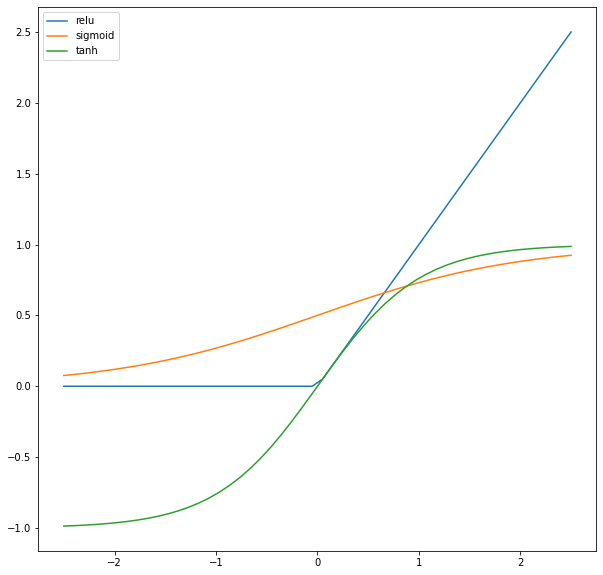

In [90]:
## relu
import matplotlib.pyplot as plt


def relu(x):
    x = x.copy()
    x[x<0] = 0 
    return x


    



X = np.linspace( -2.5, 2.5 )


plt.figure( figsize=(10,10))

plt.plot( X, relu(X) , label="relu")
plt.plot( X, sigmoid(X) , label="sigmoid")
plt.plot( X, np.tanh(X) , label="tanh")

plt.legend()
plt.show()


## Neural nets for regression and classification


As we have seen so far, the main components of a neural network are architecture, the output shape and activation function and the loss function.

For binary classification, as we have seen, we can use 1 output with a sigmoid activation and treat the resulting value as probability of the class and attach a cross entropy loss to this architecture.


For regression we can use 1 output and we can skip the linearity as some times it makes no sense to restrict values to the range (0,1) or (-1,1).

In other cases, we may want to transfor the target variables to this range and use tanh or sigmoid.


### Loss functions

For classification problems with more than 2 classes, we are using the 1-hot encoding for target representation and as output activation function the softmax function, defined as :

$ softmax(x_i) = \frac{ e^{x_i} }{  \sum_j{e^{x_j}}  }$ 



In [94]:
def softmax(x):
    return np.exp(x)/sum(np.exp(x))


a = [1,2,3]
s = softmax(a)
s, sum(s)

(array([0.09003057, 0.24472847, 0.66524096]), 1.0)

For regression problem, we typically use mean squared error. 


## Learning rate

The learning rate parameter plays a very important role in the training of neural networks: 

A large value may cuase the training to diverge. 

A very small learning rate can result in very slow training 

## Dropout


Neural nets are powerfull function aproximators and very prone to overfiting.

One way to prevent the network to memorize training examples is Dropout
In dropout, we are dropping random activations in inner layers, forcing the network to learn "alternative" pathways.

